In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\HR_comma_sep.csv")

In [3]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [4]:
hr.rename(columns=lambda x:x.strip(),inplace=True)

In [5]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [6]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
hr["number_project"]=hr["number_project"].astype("category")

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
hr.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project           category
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Departments                object
salary                     object
dtype: object

In [11]:
hr["time_spend_company"]=hr["time_spend_company"].astype("category")

In [12]:
hr1=pd.get_dummies(hr)

In [13]:
hr1.shape

(14999, 33)

In [14]:
hr1.head()

,satisfaction_level,last_evaluation,average_montly_hours,Work_accident,left,promotion_last_5years,number_project_2,number_project_3,number_project_4,number_project_5,...,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,157,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,262,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,272,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,223,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,159,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
train,test=train_test_split(hr1,test_size=0.3,random_state=0)
print(train.shape,test.shape)

(10499, 33) (4500, 33)


In [17]:
x_train=train.drop(["left"],axis=1)
y_train=train["left"]
x_test=test.drop(["left"],axis=1)
y_test=test["left"]

In [19]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver="lbfgs")
lg.fit(x_train,y_train)

C:\Users\Koti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag'

In [21]:
from sklearn.linear_model import LogisticRegressionCV
lg1=LogisticRegressionCV()
lg1.fit(x_train,y_train)

C:\Users\Koti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Koti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Koti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Koti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [22]:
help(LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model._logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin)
 |  LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
 |  
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |  
 |  

In [23]:
lg1.cv

In [24]:
lg1.coefs_paths_

{1: array([[[-3.35104942e-02, -8.16025955e-04,  3.88575099e-03, ...,
           2.36517757e-02, -1.20657159e-02, -1.90648470e+00],
         [-2.11396114e-01,  6.45763820e-04,  4.51381316e-03, ...,
           1.28866740e-01, -5.00846213e-02, -1.90187844e+00],
         [-7.62134127e-01,  1.06536034e-01,  6.35200346e-03, ...,
           3.41066032e-01, -1.79106390e-02, -2.07999058e+00],
         ...,
         [-2.15463127e+00,  2.23707034e+00,  9.28500911e-03, ...,
           4.61595053e-01,  2.43081475e-02, -3.89539218e+00],
         [-2.15463127e+00,  2.23707031e+00,  9.28535813e-03, ...,
           4.61595074e-01,  2.43081134e-02, -3.89539218e+00],
         [-2.15463129e+00,  2.23707018e+00,  9.28501061e-03, ...,
           4.61595164e-01,  2.43079537e-02, -3.89539222e+00]],
 
        [[-3.31484111e-02, -1.13788403e-03,  3.47916254e-03, ...,
           2.28626293e-02, -1.11618985e-02, -1.82177113e+00],
         [-2.10218379e-01, -1.25569240e-03,  4.12234600e-03, ...,
           1.24324

In [25]:
lg1.coef_

array([[-2.1566089 ,  2.24358592,  0.00881543, -1.48014123, -1.20653764,
         2.09096317, -3.10809112, -1.83605946, -1.11171145, -0.41466577,
         3.21436987, -1.82956132,  0.83504739,  0.94611897,  2.80499459,
         1.68754473, -1.99554576, -1.9110372 , -1.70275615, -0.26636163,
        -0.60062644,  0.02461652,  0.27230442, -0.13261113, -0.09189228,
        -0.3973424 , -0.07244507,  0.03874341,  0.06041983, -1.56458325,
         0.40683446, -0.00744599]])

In [26]:
lg1.l1_ratios_

array([None], dtype=object)

In [27]:
lg1.scores_

{1: array([[0.75904762, 0.75904762, 0.84571429, 0.88333333, 0.89333333,
         0.8952381 , 0.89428571, 0.89380952, 0.89380952, 0.89380952],
        [0.75857143, 0.75857143, 0.84238095, 0.88142857, 0.88666667,
         0.88761905, 0.88619048, 0.88714286, 0.88714286, 0.88761905],
        [0.75857143, 0.75857143, 0.84      , 0.88238095, 0.88857143,
         0.89      , 0.89      , 0.89      , 0.89      , 0.89      ],
        [0.75857143, 0.75857143, 0.84761905, 0.88095238, 0.88238095,
         0.88571429, 0.88428571, 0.8852381 , 0.8852381 , 0.8852381 ],
        [0.75893283, 0.75893283, 0.85516913, 0.89375893, 0.89757027,
         0.90090519, 0.89804669, 0.89804669, 0.89804669, 0.89804669]])}

In [28]:
lg1.score(x_train,y_train)

0.8933231736355843

In [30]:
lg1.predict_proba(x_train)[::,1]

array([6.61116555e-01, 1.08151958e-01, 6.26126374e-04, ...,
       1.89559381e-02, 2.42603600e-02, 1.30110854e-02])

In [31]:
np.max(lg1.predict_proba(x_train)[::,1])

0.9992308690125632

In [32]:
np.min(lg1.predict_proba(x_train)[::,1])

1.2954859524672851e-05

In [33]:
train["pred_prob"]=lg1.predict_proba(x_train)[::,1]

C:\Users\Koti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
train.head()

,satisfaction_level,last_evaluation,average_montly_hours,Work_accident,left,promotion_last_5years,number_project_2,number_project_3,number_project_4,number_project_5,...,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical,salary_high,salary_low,salary_medium,pred_prob
10438,0.53,0.52,135,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0.661117
9236,0.77,0.53,256,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.108152
818,0.89,0.79,149,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0.000626
11503,0.64,0.63,156,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0.009174
11721,0.98,0.74,151,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0.021072


In [35]:
lg.predict(x_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
train["pred"]=lg.predict(x_train)

C:\Users\Koti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
train.head()

,satisfaction_level,last_evaluation,average_montly_hours,Work_accident,left,promotion_last_5years,number_project_2,number_project_3,number_project_4,number_project_5,...,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical,salary_high,salary_low,salary_medium,pred_prob,pred
10438,0.53,0.52,135,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0.661117,1
9236,0.77,0.53,256,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.108152,0
818,0.89,0.79,149,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0.000626,0
11503,0.64,0.63,156,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0.009174,0
11721,0.98,0.74,151,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0.021072,0


In [38]:
train["pred"].value_counts()

0    7943
1    2556
Name: pred, dtype: int64

In [87]:
train["pred_flag"]=np.where(train["pred_prob"]>0.513,1,0)

C:\Users\Koti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
train["pred_flag"].value_counts()

0    7942
1    2557
Name: pred_flag, dtype: int64

In [89]:
pd.crosstab(train["pred"],train["pred_flag"])

pred_flag,0,1
pred,,
0,7886,57
1,56,2500


In [93]:
pd.crosstab(train["left"],train["pred"])

pred,0,1
left,,
0,7363,603
1,580,1953


In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(train["left"],train["pred"])

array([[7363,  603],
       [ 580, 1953]], dtype=int64)

In [92]:
cm=confusion_matrix(train["left"],train["pred"])

Text(0.5, 15.0, 'predicted')

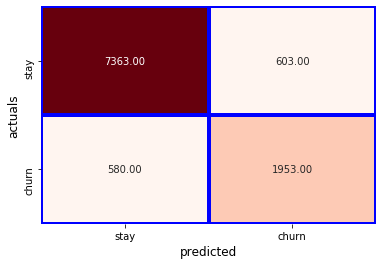

In [105]:
sns.heatmap(cm,annot=True,fmt='.2f',cmap="Reds",linecolor="b",linewidths=3,cbar=False,xticklabels=["stay","churn"]
            ,yticklabels=["stay","churn"])
plt.ylabel("actuals",fontsize=12)
plt.xlabel("predicted",fontsize=12)

In [106]:
(7363+1953)/(len(train))

0.887322602152586

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(train["left"],train["pred"])

0.887322602152586

In [109]:
from sklearn.metrics import brier_score_loss
brier_score_loss(train["left"],train["pred"])

0.11267739784741404